In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%run play_coin_game.ipynb

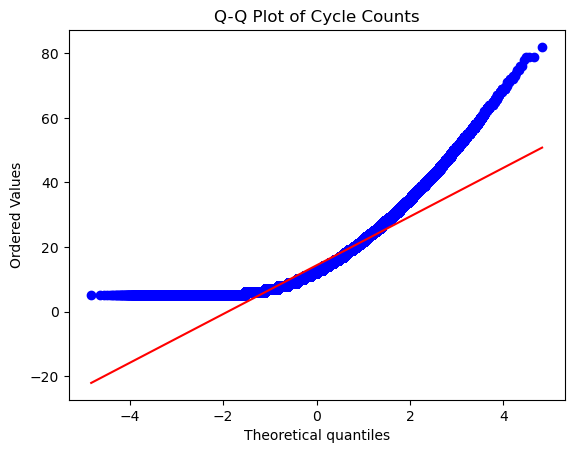

In [3]:
# Create a Q-Q plot
def q_q_plot(data):
    stats.probplot(cycle_counts, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Cycle Counts")
    plt.show()
q_q_plot(cycle_counts)

In [4]:
def normality_test(data):
    # Perform the Shapiro-Wilk test for normality
    statistic, p_value = stats.shapiro(data)

    # Set the significance level (alpha)
    alpha = 0.05

    # Check if p-value is less than alpha
    if p_value < alpha:
        print("The data is not normally distributed.")
    else:
        print("The data is normally distributed.")

normality_test(cycle_counts[:5000])

The data is not normally distributed.


In [5]:
def boostrap_CI(data):
    # Perform bootstrap resampling and calculate mean and confidence intervals
    num_bootstrap_samples = 1000
    bootstrap_means = []
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)

    # Calculate 95% confidence interval
    confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

    # Calculate the mean of bootstrap means
    mean_of_bootstrap_means = np.mean(bootstrap_means)

    return mean_of_bootstrap_means, confidence_interval


mean_value, confidence_interval = boostrap_CI(cycle_counts)

print("Mean of Bootstrap Means:", round(mean_value,2))
print("Bootstrap 95% Confidence Interval:", confidence_interval)


Mean of Bootstrap Means: 14.35
Bootstrap 95% Confidence Interval: [14.3365979  14.36816968]
